# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer:** This is a classification problem. The output of our model will be discrete. We are trying to determine if a student needs an intervention. This is a yes or no question.


## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

#options
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


C:\Users\elamarre\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [2]:
# import statements
from __future__ import division

# TODO: Compute desired values - replace each '?' with an appropriate expression/function call
n_students = student_data.shape[0]
n_features = (student_data.shape[1]-1)
n_passed = np.count_nonzero(student_data.passed == 'yes')
n_failed = np.count_nonzero(student_data.passed == 'no')
grad_rate = (n_passed/n_students*100)

print "Total number of students: {}".format(n_students)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)
print "Number of features: {}".format(n_features)

Total number of students: 395
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%
Number of features: 30


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [3]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
num_feature_cols = len(feature_cols)
print "\nFeature values ({}):".format(num_feature_cols)
pd.options.display.max_columns = 999
X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values (30):


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4


### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [4]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
# import some thangs
from sklearn import cross_validation

#Number of training points
num_train = 300

# First, decide how many training vs test samples you want
test_prop = (X_all.shape[0] - num_train) / X_all.shape[0]

# TODO: Then, select features (X) and corresponding labels (y) for the training and test sets
# Note: Shuffle the data or randomly select samples to avoid any bias due to ordering in the dataset
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_all, y_all, test_size = test_prop, random_state=57)

print "Training set: {} samples".format(X_train.shape[0])
print "Test set: {} samples".format(X_test.shape[0])
# Note: If you need a validation set, extract it from within training data

Training set: 300 samples
Test set: 95 samples


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

**Answer: **
#### Decision Tree
---
*General Application:* Decision tree's can be used for both classification and regression problems. They are easy to conceptualize and can work with both categorical and numerical data.

*Strengths:* 
- The cost of training and predicting are both logarithmic, as such large data sets do not come at a large computational cost. 
- Decision trees do not require a significant amount of data preparation. Normalization, dummy variable creation, and missing value removal usually do not need to be performed.
- Models can be validated using visualizations and statistical tests.


*Weaknesses:*
- Decision trees are prone to over fitting.
- Because decision trees use a top down approach they struggle with some functions that require input from a higher level, such as XOR.
- Decision trees can be somewhat unstable. Variations in the data can cause completely different trees to be generated from fit to fit.

*Applicability:* Using a decision tree would meet the school districts request that the model be very efficient. As the school gathers more and more data this model would not become significantly more expensive. Additionally, decision trees require little data preparation, which would further reduce costs. The decision tree would also be a good choice because it would allow the school district to explore why students are failing by visualizing the tree.


#### SVM
---
*General application:* Support vector machines (SVMs) are general-purpose binary classifiers. SVMs work by defining a decision boundary, which is a hyper-plane of the data set. The hyper-plane can be thought of as the line of least commitment to the data. SVMs are very efficient as modeling data in higher dimensions.  By using the Kernel Trick SVMs are able to model higher dimensional relationships without actually projecting into that dimension.

*Strengths:*
- SVMs are very efficient at modeling data in higher dimensional spaces.
- SVMs use quadratic programming, which helps them to be very memory efficient. During the quadratic programing phase of the algorithm data points that do not help define the decision boundary are dropped.
- SVMs also offer some versatility in modeling higher dimensional data sets because different kernels can be employed.

*Weaknesses:*
- SVMs can take a long time to train. Training time is the cubic of the size of the data.
- SVMs do not do well with noisy data sets. SVMs will often over fit to the noise in the data.
- It is difficult to determine probabilities from the SVM, therefore it is difficult to get any insight past the classification that the SVM spits out.

*Applicability:* If non-linarites were found in the data a support vector machine would be a strong candidate because of its efficiency in higher dimensions. A support vector machine would also be a memory efficient solution for the school, because the SVM algorithm is able to drop unnecessary data points. However, due to the school districts budget constraints a SVM may not be the optimal choice as training time for a SVM is the cubic of the size of that data set.

#### Naive Bayes
---

*General application:* Naïve Bayes is a general-purpose classifier on Bayes theorem. To make the algorithm computationally tractable Naïve Bayes classifiers make the naïve assumption that feature label pairs are conditionally independent of each other. The naïve assumption allows the classifier to be very computationally efficient.

*Strengths:*
- Very computationally efficient
- Handles missing values well
- Can calculate probabilities in any direction, which can help us learn about the data.

*Weaknesses:*
- Does not do well with data which has strong conditional dependencies
- Probability estimates are often not very accurate
- Can require a significant amount of data to get a high prediction accuracy

*Applicability:* A Guassian Naïve Bayes classifier would be a strong choice for the school district. The Bayesian classifier is very efficient at training, which would meet the districts requirement for efficiency. However we may run into some issues with conditional dependencies with the Naïve Bayes classifier. It seems likely that many of the features could be correlated.

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [6]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [7]:
# TODO: Import the three supervised learning models from sklearn
from sklearn import tree
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 

# TODO: Initialize the three models
clf_A = tree.DecisionTreeClassifier(random_state=57)
clf_B = svm.SVC(random_state=57)
clf_C = GaussianNB()

# TODO: Execute the 'train_predict' function for each classifier and each training set size


# looping adapted from 1st submission reviewer 
for clf in [clf_A, clf_B, clf_C]:
    
    # show the estimator type
    print "\n{}: \n".format(clf.__class__.__name__)
    
    for n in [100, 200, 300]:
        train_predict(clf, X_train[:n], y_train[:n], X_test, y_test)


DecisionTreeClassifier: 

Training a DecisionTreeClassifier using a training set size of 100. . .
Trained model in 0.0010 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.6504.
Training a DecisionTreeClassifier using a training set size of 200. . .
Trained model in 0.0010 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.6226.
Training a DecisionTreeClassifier using a training set size of 300. . .
Trained model in 0.0020 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.7704.

SVC: 

Training a SVC using a training set size of 100. . .
Trained model in 0.0000 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.8805.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.8052.
Training a SVC u

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - Decision Tree Classifier**  

| Training Set Size |    Training Time        | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |     0.0020 seconds      |     0.0004 seconds     |     1.0000       |       0.6504    |
| 200               |        0.0039 seconds   |          0.0007 seconds|       1.0000     |        0.6226   |
| 300               |       0.0045 seconds    |    0.0004 seconds      |       1.0000     |    0.7704       |

** Classifer 2 - SVC**  

| Training Set Size | Training Time           | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |    0.0031 seconds       |       0.0012 seconds   |        0.8805    |     0.8052      |
| 200               |     0.0072 seconds      |        0.0021 seconds  |         0.8737   |     0.7778      |
| 300               |      0.0139 seconds     |     0.0027 seconds     |   0.8726         |    0.8000       |

** Classifer 3 - GaussianNB**  

| Training Set Size | Training Time           | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |          0.0026 seconds |        0.0006 seconds  |      0.5941      |    0.4396       |
| 200               |      0.0037 seconds     |        0.0009 seconds  |   0.7752         |   0.7656        |
| 300               |         0.0034 seconds  |       0.0006 seconds   |  0.7971          |    0.7402       |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Chosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: ** A decision tree classifier would be the best choice for the school district. Prior to tuning, the decision tree is the most efficient, requires the least amount of data preparation, is the easiest to understand, and has almost the highest F1 score. The SVC did often have a slightly better F1 score in a few runs with different training and testing splits. However, the SVC is very inefficient as the training time is the cubic of the data set size. The GaussianNB was also a strong candidate but the Decision tree classifier consistently beat it out on F1 scores. With the GaussianNB I would also worry about conditional dependencies in the data set.

An added benefit of the decision tree classifier is that the board will be able to dig into the logic behind the model to determine which factors are contributing to the results. After a little tuning I think that the decision tree classifier will produce the most accurate results and be the most efficient choice.


### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. For example if you've chosen to use a decision tree or a support vector machine, how does the model go about making a prediction?*

**Answer: ** A decision tree labels data by putting it through a tree of decision nodes. The decision tree is like a flow chart. Consider a simple decision tree that predicts if you should get lunch, the two features that affect this decision are as follows. Are you hungry (yes/no)? And is it lunchtime (yes/no)?  This tree only consists of two layers; the hungry layer and the lunchtime layer. The tree labels data as follows; if you are hungry than it predicts you should get lunch, if you are not hungry it moves to the next layer, on this layer if it is lunchtime it predicts you should get lunch, and if it is not lunchtime it predicts you should not get lunch.

The process for training a decision tree involves using an algorithm called ID3. This algorithm builds the tree layer by layer. On each layer the algorithm separates the data based on which feature will yield the highest information gain. For example if a tree were trying to predict a person’s name, the top layer would likely be what the gender of the person is. The algorithm then continues to add layers until the data can no longer be separated or a max layer threshold is reached. We then test the tree with data which it has never seen before to see how it performs.


### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [18]:
# TODO: Import 'gridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn import tree

# TODO: Create the parameters list you wish to tune
# note: tested a range of parameters but removed 4 because it yields best in CV but not in test
parameters = {'max_depth' : [2,3,5,6,7,8,9,10]}

# TODO: Initialize the classifier
clf = tree.DecisionTreeClassifier()

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, greater_is_better=True, pos_label='yes')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=f1_scorer, cv=10)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_
'''tree.export_graphviz(clf
                     , out_file='/Users/evanlamarre/Desktop/tree.dot'
                     , feature_names=list(X_train.columns)
                     , class_names=['yes','no'])'''

print 'Lets look at the validation scores:'
print 'Max depth chosen: {}'.format(grid_obj.best_params_['max_depth'])
from IPython.display import display
display(pd.DataFrame(grid_obj.grid_scores_))
# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test))

Lets look at the validation scores:
Max depth chosen: 3


,parameters,mean_validation_score,cv_validation_scores
0,{u'max_depth': 2},0.790535,"[0.723404255319, 0.869565217391, 0.85106382978..."
1,{u'max_depth': 3},0.797221,"[0.652173913043, 0.818181818182, 0.8, 0.826086..."
2,{u'max_depth': 5},0.782164,"[0.734693877551, 0.8, 0.761904761905, 0.8, 0.7..."
3,{u'max_depth': 6},0.775119,"[0.68085106383, 0.8, 0.75, 0.8, 0.761904761905..."
4,{u'max_depth': 7},0.745402,"[0.666666666667, 0.772727272727, 0.65, 0.8, 0...."
5,{u'max_depth': 8},0.758448,"[0.708333333333, 0.826086956522, 0.78048780487..."
6,{u'max_depth': 9},0.722371,"[0.571428571429, 0.818181818182, 0.71794871794..."
7,{u'max_depth': 10},0.695533,"[0.666666666667, 0.809523809524, 0.66666666666..."


Made predictions in 0.0010 seconds.
Tuned model has a training F1 score of 0.8361.
Made predictions in 0.0000 seconds.
Tuned model has a testing F1 score of 0.7910.


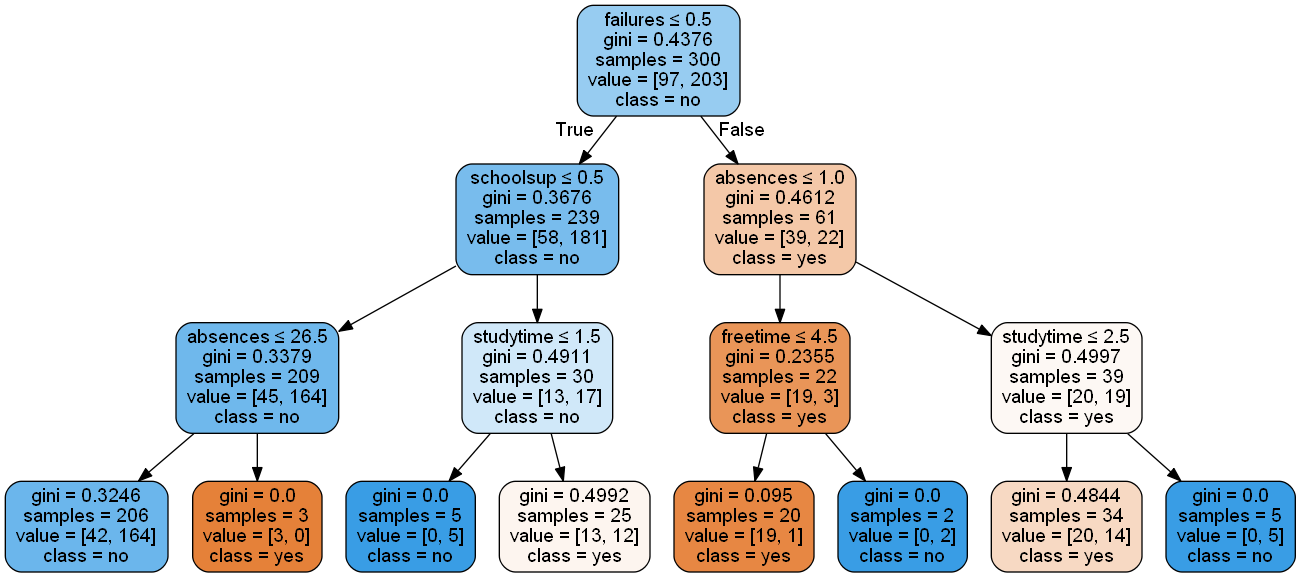

In [20]:
# taking a look at the tree, adapting graph viz code from reviewer #1
from sklearn import tree
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

clf = grid_obj.best_estimator_
dot_data = StringIO()  
tree.export_graphviz(clf
                     , out_file=dot_data
                     , feature_names= X_train.columns
                     , class_names = ['yes', 'no']
                     , filled=True 
                     , rounded=True
                     , special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **

F1_train = 0.8361 | F1_test = 0.7910

Looks like our parameter optimization did help improve the F1 score for the testing set. The F1 score for the training set decreased as expected, the decision tree was perfectly fitting the training data set previously. The model was likely over fitting as when we limited the max depth the F1 score increased.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.